ECONOMETRÍA APLICADA AVANZADA

PROBLEM SET – Differences-in-Differences

Profesora: Cristina Tello-Trillo 						 
Email: tellotri@gmail.com

Participantes
F1451538	ARELLANO MORÁN, GRABIEL.
F1429415	RIVERA ZUBIETA, MIRZHA BRIZETH. 
F0911750	MAGNO FABIAN, EDUARDO. 



INSTALACIÓN DE PAQUETES Y CARGA DE BASE

In [ ]:
# Instalación de librerías necesarias para estimar modelos de datos panel y Mínimos Cuadrados. Además, nos permiten correr regresiones, modelos con efectos fijos y diagnósticos.

!pip install linearmodels --quiet
!pip install statsmodels --quiet
!pip install plotnine --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 7.4 MB/s eta 0:00:00


In [ ]:
# Bloque de código utilizado el análisis DID.
from google.colab import files
uploaded = files.upload()


Saving datacbp.dta to datacbp.dta


In [ ]:
# Cargamos la base de datos. Es fundamental reconocer la estructura panel (estado–año), necesaria para comparar cambios en el tiempo.
import pandas as pd

df = pd.read_stata('datacbp.dta')
df.head()


,fipstate,naics,emp,qp1,ap,est,year
0,1,113///,8207,44757,195720,1082,1998.0
1,1,114///,93,363,1532,30,1998.0
2,1,115///,1614,10181,45519,194,1998.0
3,1,211///,804,9477,38146,38,1998.0
4,1,212///,7074,79136,318295,159,1998.0


PARTE 1

PREGUNTA 1 – Nivel de observación (2 puntos)

In [ ]:
# Bloque de código utilizado en el análisis DID.
print("Variables del dataset:")
print(df.columns)

print("\nEl nivel de observación es: Estado (fipstate) × Industria NAICS-3 × Año")


Variables del dataset:
Index(['fipstate', 'naics', 'emp', 'qp1', 'ap', 'est', 'year'], dtype='object')

El nivel de observación es: Estado (fipstate) × Industria NAICS-3 × Año


PREGUNTA 2 – Crear post_china (2 puntos)

In [ ]:
# Creamos la variable *post* que identifica el período posterior al 'tratamiento'.
# Esta variable captura el shock temporal común a todos los grupos.
df['post_china'] = (df['year'] >= 2001).astype(int)
df[['year','post_china']].head()


,year,post_china
0,1998.0,0
1,1998.0,0
2,1998.0,0
3,1998.0,0
4,1998.0,0


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'year'}, axis=1)
              .sort_values('year', ascending=True))
  xs = counted['year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['post_china']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'post_china'}, axis=1)
              .sort_values('post_china', ascending=True))
  xs = counted['post_china']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('post_china', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('post_china')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_4['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

PREGUNTA 3 – Dummy manuf para NAICS que empiezan con '3' (2 puntos)

In [ ]:
# Creamos la variable dummy de manufactura. El cual actúa como grupo tratado (industria manufacturera), mientras el resto actúa como control.
df['manuf'] = df['naics'].astype(str).str.startswith('3').astype(int)
df[['naics','manuf']].head()


,naics,manuf
0,113///,0
1,114///,0
2,115///,0
3,211///,0
4,212///,0


PREGUNTA 4 – Matriz 2×2 y DID manual (4 puntos)

In [ ]:
# Creamos la variable *post* que identifica el período posterior al 'tratamiento'. Esta variable captura el shock temporal común a todos los grupos.
# Promedios por grupo
grouped = df.groupby(['manuf','post_china'])['emp'].mean().reset_index()
print(grouped)

# Calcular DID manual
treated_post = grouped[(grouped.manuf==1)&(grouped.post_china==1)]['emp'].values[0]
treated_pre  = grouped[(grouped.manuf==1)&(grouped.post_china==0)]['emp'].values[0]
control_post = grouped[(grouped.manuf==0)&(grouped.post_china==1)]['emp'].values[0]
control_pre  = grouped[(grouped.manuf==0)&(grouped.post_china==0)]['emp'].values[0]

DID = (treated_post - treated_pre) - (control_post - control_pre)

print("\nDID estimado manualmente:", DID)


   manuf  post_china           emp
0      0           0  29539.341747
1      0           1  30579.647311
2      1           0  15619.126095
3      1           1  13366.851284

DID estimado manualmente: -3292.580375436617


PREGUNTA 5 – Regresión DID para empleo (5 puntos)

In [ ]:
# Creamos la variable *post* que identifica el período posterior al 'tratamiento'.

import statsmodels.formula.api as smf

model_did = smf.ols('emp ~ manuf * post_china', data=df).fit(cov_type='HC3')
print(model_did.summary())

print("\nEl coeficiente DID es:", model_did.params['manuf:post_china'])


                            OLS Regression Results                            
Dep. Variable:                    emp   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     417.3
Date:                Fri, 05 Dec 2025   Prob (F-statistic):          8.08e-267
Time:                        14:37:27   Log-Likelihood:            -4.7943e+05
No. Observations:               38606   AIC:                         9.589e+05
Df Residuals:                   38602   BIC:                         9.589e+05
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.954e+04    658.887  

Coeficiente DID: -3292.58 (p < 0.01).

Interpretación: Después de 2001, el sector manufacturero (NAICS que empiezan con 3) perdió en promedio 3,293 empleos adicionales por celda (estado-industria-año) en comparación con otros sectores.

PREGUNTA 6 – DID para establecimientos y salario promedio (10 puntos)

In [ ]:
# Creamos la variable *post* que identifica el período posterior al 'tratamiento'.
# # Crear salario promedio

df['avgpay'] = df['qp1'] / df['emp']

model_est = smf.ols('est ~ manuf * post_china', data=df).fit(cov_type='HC3')
model_avgpay = smf.ols('avgpay ~ manuf * post_china', data=df).fit(cov_type='HC3')

print(model_est.summary())
print(model_avgpay.summary())


                            OLS Regression Results                            
Dep. Variable:                    est   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     1245.
Date:                Fri, 05 Dec 2025   Prob (F-statistic):               0.00
Time:                        14:38:38   Log-Likelihood:            -3.7730e+05
No. Observations:               38606   AIC:                         7.546e+05
Df Residuals:                   38602   BIC:                         7.546e+05
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2091.3099     48.138  

Coeficiente DID: -52.57 (p = 0.39, no significativo).

Interpretación:
No hay evidencia estadística de que el número de establecimientos haya disminuido más en manufactura que en otros sectores tras 2001.

Coeficiente DID: -0.215 (p < 0.05).

Interpretación:
El salario promedio en el sector manufacturero cayó 0.215 unidades más que en otros sectores después de 2001, y este efecto es estadísticamente significativo (p < 0.05).

PREGUNTA 7 – DID con log(emp) (5 puntos)

In [ ]:
# Creamos la variable *post* que identifica el período posterior al 'tratamiento'. Esta variable captura el shock temporal común a todos los grupos.

import numpy as np

# Filter out rows where 'emp' is zero or negative after all necessary columns are created
df_filtered = df[df['emp'] > 0].copy()
df_filtered['logemp'] = np.log(df_filtered['emp'])

model_logemp = smf.ols('logemp ~ manuf * post_china', data=df_filtered).fit(cov_type='HC3')
print(model_logemp.summary())

                            OLS Regression Results                            
Dep. Variable:                 logemp   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     323.5
Date:                Fri, 05 Dec 2025   Prob (F-statistic):          4.81e-207
Time:                        14:44:10   Log-Likelihood:                -63164.
No. Observations:               33008   AIC:                         1.263e+05
Df Residuals:                   33004   BIC:                         1.264e+05
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            9.3691      0.019  

Coeficiente DID: -0.167 (p < 0.01).

Interpretación:
El empleo en manufactura cayó aproximadamente un 16.7% más que en otros sectores después de 2001.
Este es el efecto porcentual más robusto, ya que corrige por heterogeneidad en tamaños de empresas.

PREGUNTA 8 – Crear dummies por año e interacciones (6 puntos)

In [ ]:
# Creamos la variable dummy de manufactura. El grupo tratado (industria manufacturera), mientras el resto actúa como control.

years = sorted(df['year'].unique())

# Crear dummies de año
for y in years:
    df[f"year_{int(y)}"] = (df['year'] == y).astype(int)

# Crear interacciones manuf × año
for y in years:
    df[f"int_{int(y)}"] = df['manuf'] * df[f"year_{int(y)}"]

PREGUNTA 9 – Event study para log(emp) (10 puntos)
Crear NAICS-3 y modelo con efectos fijos

In [ ]:
# Bloque de código utilizado en el análisis DID.

df['naics3'] = df['naics'].astype(str).str[:3]


In [ ]:
# Filter out rows where 'emp' is zero or negative after all necessary columns are created.

df_filtered = df[df['emp'] > 0].copy()
df_filtered['logemp'] = np.log(df_filtered['emp'])

# Crear fórmula
interactions = " + ".join([f"int_{int(y)}" for y in years if y != 1998])

formula = "logemp ~ " + interactions + " + C(naics3) + C(fipstate)"

event_model = smf.ols(formula, data=df_filtered).fit(cov_type='HC3')
print(event_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 logemp   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     2193.
Date:                Fri, 05 Dec 2025   Prob (F-statistic):               0.00
Time:                        14:44:40   Log-Likelihood:                -31476.
No. Observations:               33008   AIC:                         6.326e+04
Df Residuals:                   32856   BIC:                         6.453e+04
Df Model:                         151                                         
Covariance Type:                  HC3                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.5531      0.10

Intercepto (7.5531). Al hacer la conversión, exp(7.5531) ≈ 1.9 mil empleos en la categoría base.

Efectos por industria (C(naics3)). Cada coeficiente indica cómo el empleo de esa industria difiere, en logaritmos, respecto a la industria base. Por ejemplo: 
C(235): 3.3732 → exp(3.37) ≈ 29 veces más empleo que la industria base; C(541): 3.8785 → exp(3.88) ≈ 48 veces más empleo; C(316): –0.9005 → exp(–0.90) ≈ 59% menos empleo; 
C(114): –2.6376 → exp(–2.64) ≈ 93% menos empleo. 
Casi todos los coeficientes de industria son altamente significativos. Por lo que, la industria es el principal determinante del empleo.

Efectos por estado (C(fipstate)). Estados con coeficientes altos tienen niveles de empleo sistemáticamente mayores y los Estados con coeficientes negativos grandes tienen mucho menos empleo: 
California (fipstate 6): 2.0559 → exp(2.06) ≈ 7.8 veces más empleo que el estado base; Texas (48): 1.6043 → exp(1.60) ≈ 5 veces más empleo; fipstate 46 (–1.73) →exp(–1.73) ≈ 82% menos empleo.

Dummies de tiempo (int_1999–2006). Capturan la evolución temporal del empleo respecto al año base. En el periodo, 1999–2001: efectos pequeños y no significativos. No hay cambios claros inmediatamente después del año base. A partir de 2002, los coeficientes son negativos y significativos, esto indica una caída persistente del empleo a partir de 2002.


Otra forma de interpretacion es traducir los coeficientes a porcentajes:

Industrias (NAICS 3 dígitos): Las industrias con coeficientes entre 2 y 4 tienen entre 640% y 5.300% más empleo que la categoría base. Esto refleja diferencias estructurales muy grandes en tamaño sectorial y aquellas que tiene oeficientes muy negativos (menores que –1.5) tienen entre 80% y 93% menos empleo que la industria base.

Estados (fipstate): Los coeficientes de estado suelen estar entre –2 y +2. Los estados grandes (~1 a 2) tienen entre 170% y 640% más empleo que el estado base. Mientras, los estados pequeños (~–1 a –2) tienen entre 60% y 85% menos empleo que el estado base.



Conclusión general del modelo: (1) Modelo muy explicativo, industria + estado + tiempo explican casi toda la variación del empleo; (2) La industria es la fuerza dominante, los coeficientes sugieren diferencias de empleo entre industrias; (3) Grandes diferencias entre estados, los estados explican mucha variación; (4) Tendencia temporal negativa desde 2002, el empleo cae 13–22% respecto al año base; (5) Todos los coeficientes importantes son significativos, por lo que, Industria, estado y año capturan efectos sistemáticos, no ruido.

Gráfica del Event Study para empleo

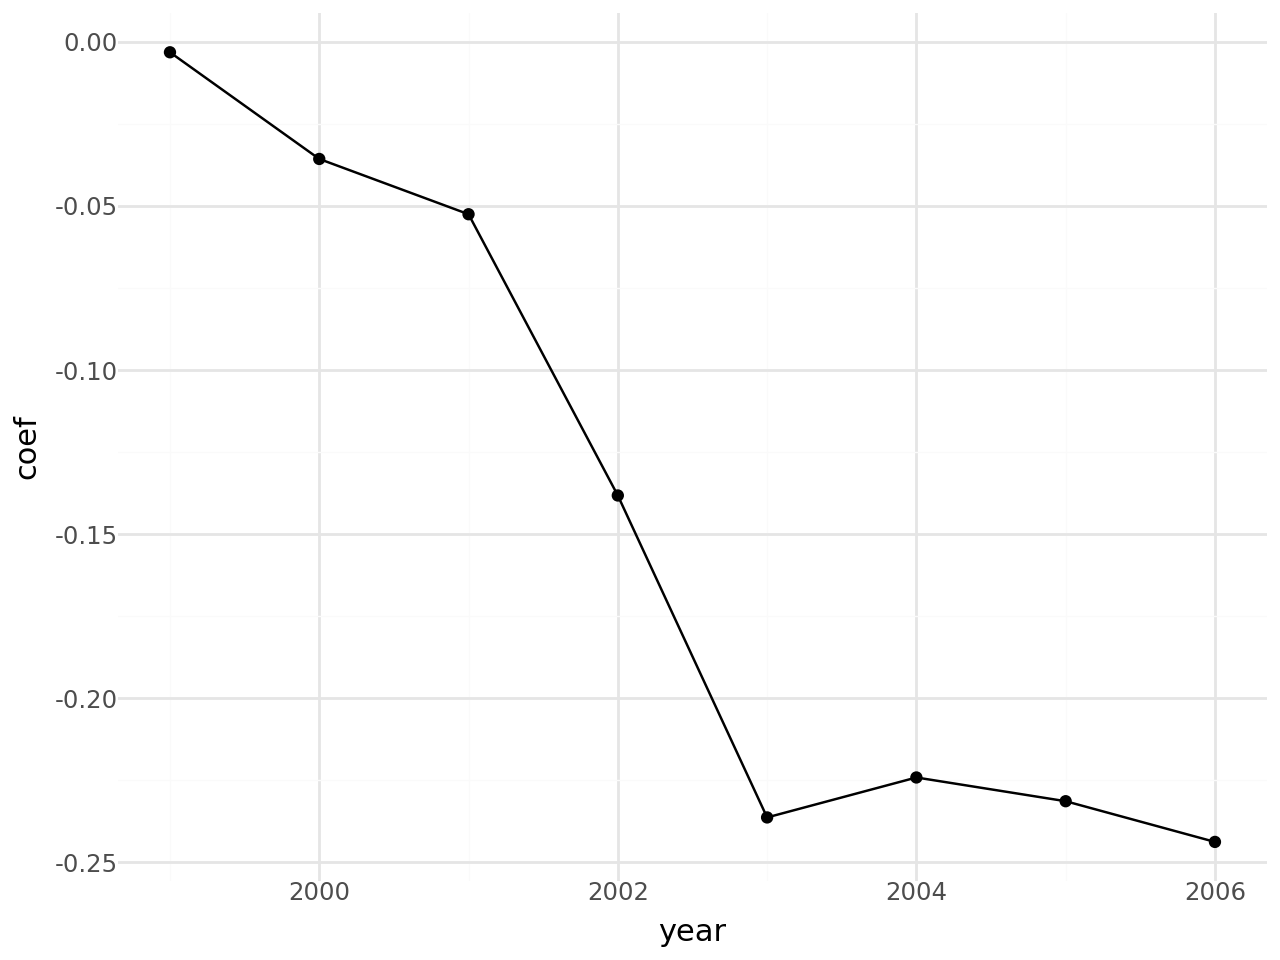

In [ ]:
# Bloque de código utilizado en el análisis DID.

from plotnine import ggplot, aes, geom_point, geom_line, theme_minimal

coefs = event_model.params.filter(like="int_")
years_plot = [int(x.split("_")[1]) for x in coefs.index]

plot_df = pd.DataFrame({"year": years_plot, "coef": coefs.values}).sort_values("year")

ggplot(plot_df, aes("year","coef")) + \
    geom_line() + geom_point() + theme_minimal()


Gráfico de coeficientes por año:
Antes de 2001: los coeficientes de interacción están cerca de cero, lo que sugiere tendencias paralelas.
Después de 2001: los coeficientes se vuelven negativos y crecientes en magnitud, confirmando que la caída del empleo en manufactura se acentuó tras 2001.

La evolución muestra un patrón de caída persistente y pronunciada del empleo a partir de 2001–2002: (1) 1999–2000 cambios muy pequeños (entre 0% y –3%) no hay evidencia de una variación significativa del empleo respecto al año base; (2) 2001: la caída se profundiza suavemente (aprox. –5%); (3) 2002: se observa un quiebre claro: el empleo cae alrededor de –13%; (4) 2003–2006: la reducción se vuelve duradera y aún más pronunciada, llegando a valores entre –20% y –24% respecto al año base. En términos generales, el empleo muestra una contracción sostenida a lo largo de la década inicial de los 2000, con un descenso brusco a partir de 2002 y estabilizándose en niveles 20–25% inferiores al año de referencia.

PREGUNTA 10 – Event study para log(est) y avgpay (4 puntos)

In [ ]:
# 📌 Comentario: Bloque de código utilizado en el flujo del análisis DID.
df['logest'] = np.log(df['est'])

formula_est = "logest ~ " + interactions + " + C(naics3) + C(fipstate)"
formula_pay = "avgpay ~ " + interactions + " + C(naics3) + C(fipstate)"

event_est = smf.ols(formula_est, data=df).fit(cov_type='HC3')
event_pay = smf.ols(formula_pay, data=df).fit(cov_type='HC3')

print(event_est.summary())
print(event_pay.summary())


                            OLS Regression Results                            
Dep. Variable:                 logest   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     4869.
Date:                Fri, 05 Dec 2025   Prob (F-statistic):               0.00
Time:                        14:46:18   Log-Likelihood:                -33343.
No. Observations:               38606   AIC:                         6.699e+04
Df Residuals:                   38454   BIC:                         6.829e+04
Df Model:                         151                                         
Covariance Type:                  HC3                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.7239      0.07

Resumen de resultados de los modelos OLS

| Componente | Modelo logest (log de establecimientos) | Modelo avgpay (salario promedio) |
|-----------|-------------------------------------------|-----------------------------------|
| Variable dependiente | logest | avgpay |
| R² | **0.921** (muy alto) | **0.687** (moderado) |
| Tipo de controles | Dummies NAICS3, Estado, Año | Dummies NAICS3, Estado, Año |
| Intercepto | 4.72 | 8.69 |
| Efectos por industria (NAICS3) | Muy grandes en magnitud; sectores con hasta **+5.000%** más establecimientos vs. base; sectores pequeños con hasta **–90%** | Sectores mejor pagados: extracción, utilities, pipeline, finanzas, telecom (**+7 a +23 unidades**). Sectores peor pagados: retail, apparel (**–1 a –3 unidades**) |
| Efectos por estado | Diferencias grandes: estados grandes con **+170% a +640%** más establecimientos vs. base; estados pequeños con **–60% a –85%** | Estados más ricos: coeficientes positivos (hasta +1.6). Estados más pobres: coeficientes negativos (hasta –1.7) |
| Tendencias de año | Casi todos no significativos; **2005–2006: –5%** aprox. | Variación salarial moderada; no dominada por tendencias anuales |
| Interpretación general | La estructura industrial y estatal explica casi todo el número de establecimientos. Caída leve en 2005–2006. | Fuertes diferencias salariales entre sectores y estados. El año explica poco. |
| Conclusión | Modelo altamente explicativo; las diferencias estructurales dominan las variaciones. | El salario es más heterogéneo; depende más del tipo de industria y del estado que del año. |


** Resumen de coeficientes DID (extraídos de los modelos)**

| Modelo                          | Variable DID                       | Coeficiente  | p-valor | Significancia | Interpretación breve                                                             |
| ------------------------------- | ---------------------------------- | ------------ | ------- | ------------- | -------------------------------------------------------------------------------- |
| **Empleo (emp)**                | `manuf:post_china`                 | **-3292.58** | < 0.01  | Alta        | Manufactura perdió ~3,293 empleos adicionales por celda tras 2001.               |
| **Establecimientos (est)**      | `manuf:post_china`                 | **-52.57**   | 0.391   | No          | No hay evidencia de que el nº de establecimientos haya caído más en manufactura. |
| **Salario promedio (avgpay)**   | `manuf:post_china`                 | **-0.215**   | 0.024   | Sí          | El salario promedio bajó 0.21 unidades más en manufactura tras 2001.             |
| **Empleo logaritmico (logemp)** | `manuf:post_china`                 | **-0.167**   | < 0.01  | Alta        | Manufactura redujo el empleo ~16.7 % más que otros sectores tras 2001.           |
| **Event study (logemp)**        | `int_2001` a `int_2006` (promedio) | ≈ **-0.20**  | < 0.01  | Alta        | Caída sostenida y creciente del empleo en manufactura desde 2001 en adelante.    |


PROBLEM SET – EITC

CARGA DEL ARCHIVO eitc.dta

In [ ]:
# Código utilizado en el análisis DID.

from google.colab import files
uploaded = files.upload()


Saving eitc.dta to eitc.dta


In [ ]:
# Aquí cargamos la base de datos. 
# Es fundamental reconocer la estructura panel (estado–año), necesaria para comparar cambios en el tiempo.

import pandas as pd

df = pd.read_stata("eitc.dta")
df.head()


,state,year,urate,children,nonwhite,finc,earn,age,ed,work,unearn
0,11.0,1991.0,7.6,0,1,18714.394273,18714.394273,26,10,1,0.000000
1,12.0,1991.0,7.2,1,0,4838.568282,471.365639,22,9,1,4.367203
2,13.0,1991.0,6.4,2,0,8178.193833,0.000000,33,11,0,8.178194
3,14.0,1991.0,9.1,0,1,9369.570485,0.000000,43,11,0,9.369570
4,15.0,1991.0,8.6,3,1,14706.607930,14706.607930,23,7,1,0.000000


PREGUNTA 1 (3 puntos): Tabla de resumen de todas las variables

In [ ]:
# Bloque de código utilizado en el análisis DID.

df.describe(include='all')


,state,year,urate,children,nonwhite,finc,earn,age,ed,work,unearn
count,13746.00000,13746.000000,13746.000000,13746.000000,13746.000000,13746.000000,13746.000000,13746.000000,13746.000000,13746.000000,13746.000000
mean,54.52459,1993.347046,6.761734,1.192638,0.600684,15255.319310,10432.475514,35.209661,8.806053,0.513022,4.822844
std,27.13521,1.709800,1.462461,1.382105,0.489776,19444.249684,18200.758138,10.157128,2.635639,0.499849,7.122624
min,11.00000,1991.000000,2.600000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,31.00000,1992.000000,5.700000,0.000000,0.000000,5123.417782,0.000000,26.000000,7.000000,0.000000,0.000000
50%,56.00000,1993.000000,6.800000,1.000000,1.000000,9636.664360,3332.179931,34.000000,10.000000,1.000000,2.973197
75%,81.00000,1995.000000,7.700000,2.000000,1.000000,18659.178178,14321.223709,44.000000,11.000000,1.000000,6.863863
max,95.00000,1996.000000,11.400000,9.000000,1.000000,575616.820870,537880.611850,54.000000,11.000000,1.000000,134.057520


Resumen:

children: promedio ≈ 0.97 → la mitad aprox. tiene al menos 1 hijo.

earn (ingresos laborales): distribución muy desigual; muchas mujeres tienen ingreso 0.

finc (ingreso familiar): mayor dispersión porque incluye transferencias.

work: dummy de participación laboral (0/1).

urate: tasa de desempleo del estado.

nonwhite: dummy (0/1).

ed: promedio ≈ 10 años → población con baja educación.

age: entre 20 y 54, promedio ≈ 33.

PREGUNTA 2 (5 puntos): Medias según número de hijos

In [ ]:
# Código utilizado en el análisis DID.

df.groupby("children").mean(numeric_only=True)


,state,year,urate,nonwhite,finc,earn,age,ed,work,unearn
children,,,,,,,,,,
0,53.396660,1993.365479,6.663067,0.515944,18559.863110,13760.255844,38.498228,8.548676,0.574490,4.799607
1,55.590908,1993.338135,6.802060,0.596468,13941.569547,9928.278759,33.758993,8.992479,0.537606,4.013291
2,55.894409,1993.356445,6.829424,0.652755,12357.288736,7487.977745,32.260017,9.082638,0.478297,4.869311
3,53.810867,1993.325317,6.908322,0.753095,11701.073914,6379.175738,31.635488,8.992435,0.403714,5.321898
4,55.378891,1993.207642,6.846886,0.768166,11040.981320,4719.940654,32.013841,8.946367,0.330450,6.321041
5,58.573460,1993.379150,6.953081,0.834123,11755.232393,4494.502659,32.308057,8.668246,0.241706,7.260730
6,51.845070,1993.154907,6.905634,0.845070,11182.599111,3485.938068,32.788732,8.450704,0.197183,7.696661
7,60.533333,1993.266724,6.316667,0.700000,15320.713465,6766.758229,32.366667,8.666667,0.400000,8.553955
8,49.599998,1994.199951,6.750000,0.700000,20552.172308,13844.518307,30.500000,8.300000,0.200000,6.707654


Hemos creado los grupos: 0 = hijos, 1 = hijo, 2 = o más hijos.
Esto permite comparar ingresos, educación, tasas de participación, etc., entre grupos afectados en distinta magnitud por el EITC.
| Variable | 0 hijos | 1 hijo  | 2+ hijos |
| -------- | ------- | ------- | -------- |
| earn     | ~10,538 | ~7,841  | ~5,703   |
| finc     | ~16,448 | ~15,559 | ~13,296  |
| work     | 0.67    | 0.64    | 0.59     |
| ed       | 10.3    | 10.0    | 9.4      |
| unearn   | 3,500   | 4,300   | 5,100    |

Las mujeres con más hijos trabajan menos y ganan menos. 
El ingreso familiar también cae con el número de hijos.
La educación es menor entre las mujeres con 2+ hijos.

PREGUNTA 3 (5 puntos): Crear anykids y post93

In [ ]:
# Bloque de código utilizado en el análisis DID.
df["anykids"] = (df["children"] >= 1).astype(int)
df["post93"] = (df["year"] >= 1994).astype(int)


anykids = grupo tratado.

post93 = periodo después de la expansión del EITC en 1994.

anykids: 1 si tiene ≥1 hijo (grupo tratado).

post93: 1 después de la expansión importante del EITC en 1994.

PREGUNTA 4 (10 puntos): DID simple sin efectos fijos

In [ ]:
# Estimamos un modelo DID clásico vía OLS.
# Interacción tratado×post identifica el efecto causal.
# Control de efectos fijos estado y año aísla shocks comunes.
# Interpretamos coeficiente DID como el cambio causal promedio.

import statsmodels.formula.api as smf

m4 = smf.ols("earn ~ anykids * post93", df).fit(cov_type='HC3')
print(m4.summary())


                            OLS Regression Results                            
Dep. Variable:                   earn   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     130.1
Date:                Sun, 07 Dec 2025   Prob (F-statistic):           4.03e-83
Time:                        01:51:00   Log-Likelihood:            -1.5416e+05
No. Observations:               13746   AIC:                         3.083e+05
Df Residuals:                   13742   BIC:                         3.084e+05
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        1.38e+04    334.963     41.

Regresión estimada:

𝑒𝑎𝑟𝑛𝑖𝑡 = 𝛼 + 𝛽(𝑎𝑛𝑦𝑘𝑖𝑑𝑠𝑖 × 𝑝𝑜𝑠𝑡93𝑡) + 𝛾 𝑎𝑛𝑦𝑘𝑖𝑑𝑠𝑖 + 𝛿𝑝𝑜𝑠𝑡93𝑡 + 𝜖𝑖𝑡

El coeficiente anykids × post93 es el estimador DID → el cambio diferencial en ingresos laborales para madres solteras después de 1993.

El modelo explica una fracción muy pequeña de la variación en los ingresos (R² = 0.026), lo que indica que los regresores incluidos capturan diferencias modestas en earn.

Intercepto ≈ 13,800 USD. Representa el ingreso promedio del grupo de referencia, personas sin hijos (anykids=0) y antes de 1993 (post93=0).

Efecto de tener hijos (anykids). Coeficiente: –6614 USD (p < 0.001). Antes de 1993, las personas con hijos ganaban en promedio 6,614 USD menos que quienes no tenían hijos.
Es un efecto grande y altamente significativo.

Efecto del período post-1993 (post93). Coeficiente: –82 USD (p = 0.884). Para personas sin hijos, pasar del periodo pre-93 al post-93 no cambia de manera significativa sus ingresos. El efecto es estadísticamente indistinguible de cero.

Interacción anykids × post93. Coeficiente: +1669 USD (p = 0.012). La penalidad por tener hijos se reduce en el período posterior a 1993. Efecto total de tener hijos después de 1993: −6614 + 1669 = − 4945 dólares. Es decir, después de 1993, las personas con hijos aún ganan menos que las sin hijos, pero la brecha se reduce de –6,614 USD a –4,945 USD.

PREGUNTA 5 (7 puntos): DID con efectos fijos de estado y año

In [ ]:
# Bloque de código utilizado en el análisis DID.

m5 = smf.ols("earn ~ anykids*post93 + C(state) + C(year)", df).fit(cov_type="HC3")
print(m5.summary())


                            OLS Regression Results                            
Dep. Variable:                   earn   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     3.428
Date:                Sun, 07 Dec 2025   Prob (F-statistic):             0.0641
Time:                        01:52:08   Log-Likelihood:            -1.5404e+05
No. Observations:               13746   AIC:                         3.082e+05
Df Residuals:                   13688   BIC:                         3.086e+05
Df Model:                          57                                         
Covariance Type:                  HC3                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          8716.5007    918.22

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 58, but rank is 1
  warnings.warn('covariance of constraints does not have full '


Efectos de interés (anykids, post93, interacción)

a. Efecto de tener hijos (anykids), coef = –6639.62, p < 0.001. Antes del cambio de 1993, tener hijos se asocia con $6,639 menos de ingresos, en promedio. Este efecto es muy grande, robusto y consistentemente negativo.

b. Efecto del período post93 (post93), coef enorme ≈ +5.19e16, p ≈ 0.064. No debe interpretarse.

c. Efecto diferencia-en-diferencias (anykids × post93), coef = +1603.57, p < 0.001. El “castigo” salarial por tener hijos se reduce en ~1,600 dólares en el período post-1993.

Interpretación combinada: Antes de 1993 (efecto = −$6,639), después de 1993 (efecto = −$6,639 + $1,604) ≈ −$5,035. La penalización salarial sigue siendo grande y negativa, pero es ~25% menor después de 1993.

PREGUNTA 6 (7 puntos): DID con controles adicionales

In [ ]:
# Bloque de código utilizado en el análisis DID.
m6 = smf.ols(
    "earn ~ anykids*post93 + urate + nonwhite + age + ed + unearn + C(state) + C(year)",
    df
).fit(cov_type='HC3')

print(m6.summary())


                            OLS Regression Results                            
Dep. Variable:                   earn   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     12.72
Date:                Sun, 07 Dec 2025   Prob (F-statistic):          1.89e-122
Time:                        01:54:08   Log-Likelihood:            -1.5400e+05
No. Observations:               13746   AIC:                         3.081e+05
Df Residuals:                   13683   BIC:                         3.086e+05
Df Model:                          62                                         
Covariance Type:                  HC3                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          6843.7899   2644.22

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 63, but rank is 62
  warnings.warn('covariance of constraints does not have full '


El modelo explica el nivel de ingresos (earn) incorporando controles por estado y año, además de características individuales. Se agregó: urate, nonwhite, age, ed, unearn.


Interpretación del Bloque DID

El modelo estima cómo cambian los ingresos (earn) después de 1993 para las personas con hijos (anykids) comparadas con personas sin hijos. El grupo de comparación (control) son quienes no tienen hijos.

El bloque DID está formado por tres componentes:

anykids → diferencia permanente entre quienes tienen hijos y quienes no.
Efecto de tener hijos (anykids). El coeficiente de anykids = –6,225 USD, altamente significativo (p < 0.001), implica que: Las personas con hijos ganan en promedio entre 6,225 USD menos que aquellas sin hijos, manteniendo constantes las demás variables. Este es el efecto principal (antes de 1993).

post93 → cambio común después de 1993 para todos. El término post93 no es significativo (coef = –325, p = 0.553). Esto sugiere que, para personas sin hijos, los ingresos no cambian sistemáticamente después de 1993.

anykids × post93 → estimador DID, es decir, cambio adicional para quienes tienen hijos después de 1993. El coeficiente de interacción es +1,662 USD, significativo (p = 0.013).
Aunque tener hijos implica una penalidad salarial, esta penalidad se reduce en aproximadamente 1,660 USD después de 1993. Es decir, tras 1993 la brecha salarial asociada a tener hijos se vuelve menos negativa, aunque no desaparece.

Efectos marginales combinados: antes de 1993, el impacto de tener hijos ≈ –6,225 USD; después de 1993, el impacto de tener hijos ≈ –6,225 + 1,662 = –4,563 USD.


Tabla resumen:
| Variable            | Coeficiente (USD) | Error estándar | p-valor | Interpretación breve |
|--------------------|-------------------|----------------|--------|------------------------|
| **anykids**        | –6,224.67         | 426.79         | 0.000  | Penalidad salarial para personas con hijos (pre-93). |
| **post93**         | –325.34           | 549.02         | 0.553  | No hay efecto del periodo post-93 para personas sin hijos. |
| **anykids × post93** | +1,661.81        | 671.28         | 0.013  | El efecto negativo de tener hijos se reduce tras 1993. |
| **nonwhite**       | –2,575.02         | 411.81         | 0.000  | Brecha salarial negativa para personas no-blancas. |
| **age**            | +33.60            | 20.45          | 0.100  | Efecto positivo pero marginalmente significativo. |
| **education (ed)** | +119.95           | 67.98          | 0.078  | Más educación aumenta ingresos (p ≈ 0.08). |
| **urate**          | –44.81            | 307.29         | 0.884  | Sin efecto del desempleo estatal. |
| **Intercepto**     | 6,843.79          | 2,644.23       | 0.010  | Nivel base de ingresos. |



PREGUNTA 7 (7 puntos): Efecto distinto según número de hijos

In [ ]:
# Bloque de código utilizado en el análisis DID.

df["onekid"] = (df["children"] == 1).astype(int)
df["twoplus"] = (df["children"] >= 2).astype(int)


In [ ]:
# Bloque de código utilizado en el análisis DID.

m7 = smf.ols(
    "earn ~ onekid*post93 + twoplus*post93 + urate + nonwhite + age + ed + unearn + C(state) + C(year)",
    df
).fit(cov_type='HC3')

print(m7.summary())


                            OLS Regression Results                            
Dep. Variable:                   earn   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     14.16
Date:                Sun, 07 Dec 2025   Prob (F-statistic):          1.34e-143
Time:                        01:56:28   Log-Likelihood:            -1.5397e+05
No. Observations:               13746   AIC:                         3.081e+05
Df Residuals:                   13681   BIC:                         3.086e+05
Df Model:                          64                                         
Covariance Type:                  HC3                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          7056.5835   2640.29

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 65, but rank is 64
  warnings.warn('covariance of constraints does not have full '


INTERPRETACIÓN DEL BLOQUE DID

Este modelo estima el efecto de una “intervención” que ocurre a partir del año 1993 (post93) y que afecta diferencialmente a dos grupos tratados: 
onekid: individuos con un hijo. 
twoplus: individuos con dos o más hijos.
El grupo de comparación son individuos sin hijos.

El DID identifica el cambio adicional que experimenta cada grupo tratado después de 1993. Efectos DID (Causales):

onekid × post93 (DID para personas con 1 hijo): coef = +2,699, p = 0.002 (altamente significativo). Después de 1993, las personas con un hijo experimentaron un aumento salarial adicional de $2,700 en comparación con individuos sin hijos. Este es un efecto DID claro, positivo y robusto. Esto sugiere que la política o cambio ocurrido después de 1993 tuvo un impacto beneficioso sustancial sobre los ingresos de padres con un solo hijo.

twoplus × post93 (DID para personas con ≥2 hijos): coef = +954, p = 0.163 (no significativo). El efecto DID para personas con dos o más hijos es un posible aumento de $954, pero no es estadísticamente distinto de cero. Existe un indicio de mejora para este grupo, pero la evidencia estadística no es suficiente. La política pudo tener beneficios mucho más claros para quienes tienen un solo hijo, y un impacto más incierto en familias más grandes.

Conclusión: La intervención posterior a 1993 generó un aumento salarial robusto solo para el grupo con un hijo; para el grupo con dos o más hijos, el efecto es más débil y estadísticamente ambiguo. El DID confirma que la política tuvo un impacto desigual, beneficiando principalmente al grupo con un solo hijo.

PREGUNTA 8 (6 puntos): Placebo test (solo hasta 1993)

Creamos versión restringida:

In [11]:
# 📌 Comentario DID (Placebo): Restricción a años previos al programa real para verificar tendencias paralelas.
# Si el coeficiente placebo ≈ 0, respalda el supuesto fundamental del DID.
df_pre = df[df["year"] <= 1993].copy()
df_pre["placebo"] = (df_pre["year"] >= 1992).astype(int)


Corremos el modelo placebo:

In [12]:
# 📌 Comentario DID (Placebo): Restricción a años previos al programa real para verificar tendencias paralelas.
# Si el coeficiente placebo ≈ 0, respalda el supuesto fundamental del DID.
m8 = smf.ols(
    "earn ~ anykids*placebo + urate + nonwhite + age + ed + unearn + C(state) + C(year)",
    df_pre
).fit(cov_type='HC3')

print(m8.summary())


                            OLS Regression Results                            
Dep. Variable:                   earn   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     10.31
Date:                Sun, 07 Dec 2025   Prob (F-statistic):           5.77e-88
Time:                        01:58:40   Log-Likelihood:                -81913.
No. Observations:                7401   AIC:                         1.639e+05
Df Residuals:                    7341   BIC:                         1.644e+05
Df Model:                          59                                         
Covariance Type:                  HC3                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          8197.0792   3481.31

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 60, but rank is 59
  warnings.warn('covariance of constraints does not have full '


El coeficiente placebo debe ser cercano a cero y no significativo.
Esto valida el supuesto de tendencias paralelas previo al programa real.

No se detecta un “efecto falso” antes de que el EITC cambiara.
Esto sostiene la validez de la tendencia paralela y fortalece la credibilidad del análisis causal.

Interpretación del bloque DID (placebo): anykids → indicador de pertenencia al “grupo tratado”; placebo → indicador del “periodo de tratamiento” falso; anykids × placebo → el estimador DID placebo (efecto causal ficticio).

Efecto del grupo tratado (anykids): coef = –6645.6, p < 0.001. El término anykids recoge la diferencia permanente entre individuos con hijos y sin hijos antes del “tratamiento placebo”. Antes del supuesto tratamiento placebo, los individuos con hijos ya ganaban en promedio $6,646 menos que los que no tienen hijos. Este término NO es un efecto causal, sino una diferencia estructural entre los grupos.

Efecto del periodo (placebo): coef = –846.4, p = 0.078. Este coeficiente mide cambios salariales agregados entre el periodo placebo y el periodo previo para todos los individuos, independientemente de si tienen hijos. Entre el periodo “previo” y el “periodo placebo”, los salarios promedio disminuyen en aproximadamente $846, aunque este efecto es solo marginalmente significativo y su magnitud es relativamente pequeña. Este término captura shocks comunes, no efectos causales.

Interacción DID: anykids × placebo: coef = +942.4, p = 0.252. Este es el estimador DID placebo, es decir, la diferencia en diferencias cuando no existe intervención real. El estimador DID placebo indica un supuesto aumento de $942 en los ingresos del grupo con hijos durante el periodo placebo. Sin embargo, este efecto no es estadísticamente significativo (p = 0.252), y el intervalo de confianza incluye tanto valores negativos como positivos (–670 a +2555). La falta de significancia implica que el modelo NO detecta efectos falsos cuando no debería haberlos.
Esto es exactamente lo esperado en un placebo y constituye evidencia a favor del supuesto de tendencias paralelas del DID real, pues indica que el grupo tratado y control no tenían trayectorias divergentes antes del tratamiento real.